In [1]:
import json
import re
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from sklearn.preprocessing import minmax_scale

from readability import Readability

from collections import Counter

import spacy
import textdescriptives as td

import pandas as pd

from sklearn import preprocessing
from tqdm import tqdm

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.mixture import GaussianMixture
import random
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import matplotlib.pyplot as plt

D:\Anaconda Python\envs\data_analytics\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
D:\Anaconda Python\envs\data_analytics\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
D:\Anaconda Python\envs\data_analytics\lib\site-packages\umap\distances.py:1086: Num

In [2]:
with open('Data/data.json', 'r', encoding="utf-8") as handle:
    dataf = json.load(handle)

testConversation = list(dataf[3].keys())[0]
print(testConversation)

W: So, I've had a look at your résumé, and you seem to have the relevant work experience. I've also checked your references, and your former employers all have nothing but good things to say about you. ---M: That's good to hear. I've been very fortunate to have worked with some great companies, under strong and inspiring leadership. ---W: Well, I just have a couple of questions for you. Where do you see yourself five years from now? ---M: Well, at my age, I'm really looking for a job that can offer me some security. Most importantly, I want a job that can give me the opportunity to build a successful career. (12) (13) I don't want to put myself in a position where I am unable to reach my full potential. (13)---W: I understand. You're open to movement within the company? ---M: Exactly. In fact, the reason I left my last two jobs was because there was no room for promotion. (13)---W: You seem very determined. We like that. I'm certain you will be given every opportunity when the appropri

In [3]:
def getMaterialDifficulty(dataf):
    
    materialsDifficultyLevel = []
    # questionsDifficultyLevel = []

    for data in tqdm(dataf):
        conv = list(data.keys())[0]
        conv = re.sub(r'\(*\d*\)', r'',conv)
        
        ques = list(data.values())[0]
        lenQues = len(ques)
    #     ques = list(data.values())[0]

        if len(conv.split()) < 100:
            materialsDifficultyLevel.append(1*0.5*lenQues)
        else:
            readability = Readability(conv)
            readabilityLevel = readability.dale_chall()
            materialsDifficultyLevel.append((readabilityLevel.score)*0.5*lenQues)   
    
#     materialDifficultyLevelNor = np.divide(materialsDifficultyLevel, max(materialsDifficultyLevel))
    materialDifficultyLevelNor = minmax_scale(materialsDifficultyLevel, feature_range=(-1, 1))
    
    return materialDifficultyLevelNor

def getQuestionsDifficulty(dataf, materialDifficultyLevelNor):
    questionsDifficultyLevelNor = []
    for i, data in tqdm(enumerate(dataf)):
        ques = list(data.values())[0]
        questionsDifficultyLevelNor.append([materialDifficultyLevelNor[i]]*len(ques))
    
    return questionsDifficultyLevelNor

In [4]:
matDiff = getMaterialDifficulty(dataf=dataf)
quesDiff = getQuestionsDifficulty(dataf=dataf, materialDifficultyLevelNor=matDiff)
print(quesDiff)

100%|███████████████████████████████████████████████████████████████████████████| 12447/12447 [00:42<00:00, 290.10it/s]
12447it [00:00, 657562.31it/s]

[[-1.0], [-1.0], [-0.9633037399721855, -0.9633037399721855], [-0.20344727766174997, -0.20344727766174997, -0.20344727766174997], [-0.1625168743434533, -0.1625168743434533, -0.1625168743434533], [0.1563355154986641, 0.1563355154986641, 0.1563355154986641, 0.1563355154986641], [-1.0], [-1.0], [-1.0], [-1.0], [-0.14321660313985884, -0.14321660313985884, -0.14321660313985884], [0.035961183340127434, 0.035961183340127434, 0.035961183340127434, 0.035961183340127434], [-0.2497039306405754, -0.2497039306405754, -0.2497039306405754], [-1.0], [-1.0], [-1.0], [-0.9266074799443711, -0.9266074799443711, -0.9266074799443711], [-0.9633037399721855, -0.9633037399721855], [-0.9633037399721855, -0.9633037399721855], [-1.0], [-0.2614371333321859, -0.2614371333321859, -0.2614371333321859], [-0.5335693922680903, -0.5335693922680903], [-1.0], [-1.0], [-0.028595741840592215, -0.028595741840592215, -0.028595741840592215], [-0.5048395636496057, -0.5048395636496057], [-0.5014151254952836, -0.5014151254952836], 

In [5]:
materials_difficulty = pd.DataFrame(data = matDiff, columns = ['Materials Difficulty'])
# questions_difficulty = pd.DataFrame(data = quesDiff, columns = ['Questions Difficulty'])
# display(difficulty_levels)
# materials_difficulty.to_csv("Data\Diffculty Level\Materials_Difficulty.csv", index=False)
# materials_difficulty.to_csv("Data\Diffculty Level\Materials_Difficulty_Index.csv")

In [6]:
print(Counter(matDiff))

Counter({-1.0: 6897, -0.9633037399721855: 757, -0.9266074799443711: 201, -0.8899112199165566: 26, -0.266743588782718: 3, -0.5214530024005453: 3, -0.2576699396428298: 2, -0.5157846942085378: 2, -0.4194280446360632: 2, -0.08769264340691219: 2, -0.2370096390241705: 2, -0.008036108225562888: 2, -0.5230832068074746: 2, -0.17628927224976199: 2, -0.05169073189844642: 2, -0.34538539477938246: 2, -0.2014176631391945: 2, -0.4663823356126279: 2, -0.5338348354194388: 2, -0.3200813235224721: 2, -0.2569817637460621: 2, -0.49026515124503334: 2, -0.1917391589138746: 2, -0.24849803820024263: 2, -0.4778231810247282: 2, -0.12147572059349099: 2, -0.4967020135285778: 2, -0.09670688091133628: 2, -0.46266321023206936: 2, -0.24602016569934515: 2, -0.47771039741403254: 2, -0.5059097662876638: 2, -0.2884473921130186: 2, -0.19741522321119342: 2, -0.5190581488707361: 2, -0.5284764959548215: 2, -0.1218851023229206: 2, -0.28890410736486105: 2, -0.45072310007880956: 2, -0.21107080880058626: 2, -0.49575129083926917: 

In [7]:
# materialsDifficultyLevel = []
# # questionsDifficultyLevel = []

# for data in dataf:
#     conv = list(data.keys())[0]
#     conv = re.sub(r'\(*\d*\)', r'',conv)
    
#     ques = list(data.values())[0]
#     lenQues = len(ques)
# #     ques = list(data.values())[0]
    
#     if len(conv.split()) < 100:
#         materialsDifficultyLevel.append(1 + (0.5*lenQues))
#     else:
#         readability = Readability(conv)
#         readabilityLevel = readability.dale_chall()
#         materialsDifficultyLevel.append(readabilityLevel.score + (0.5*lenQues))   
    
# #     questionsDifficultLevel.append([readabilityLevel.score]*len(ques))
    
# print(materialsDifficultyLevel)

In [8]:
# materialsDifficultyLevel = []

# for data in dataf:
#     conv = list(data.keys())[0]
#     conv = re.sub(r'\(*\d*\)', r'',conv)
    
#     ques = list(data.values())[0]
#     lenQues = len(ques)
# #     ques = list(data.values())[0]
    
#     if len(conv.split()) < 100:
#         materialsDifficultyLevel.append(1 + (0.5*lenQues))
#     else:
#         readability = Readability(conv)
#         readabilityLevel = readability.flesch_kincaid()
#         materialsDifficultyLevel.append(readabilityLevel.score + (0.5*lenQues))   
    
# #     questionsDifficultLevel.append([readabilityLevel.score]*len(ques))
    
# print(materialsDifficultyLevel)

In [9]:
# print("Max", max(materialsDifficultyLevel))
# print("Min", min(materialsDifficultyLevel))
# materialDifficultyLevelNor = np.divide(materialsDifficultyLevel, max(materialsDifficultyLevel))
# print(materialDifficultyLevelNor)

In [10]:
# questionsDifficultyLevelNor = []
# for i, data in enumerate(dataf):
#     ques = list(data.values())[0]   
#     questionsDifficultyLevelNor.append([materialDifficultyLevelNor[i]]*len(ques))
# print(questionsDifficultyLevelNor)

In [11]:
# print(questionsDifficultyLevelNor[1])

In [12]:
def getMaterialFeatures(dataf):
    
    materialsFeatures = pd.DataFrame()
    # questionsDifficultyLevel = []
    
#     nlp = spacy.load("en_core_web_sm")
#     nlp.add_pipe("textdescriptives/all") 
    
    
    for data in tqdm(dataf):
        conv = list(data.keys())[0]
        conv = re.sub(r'\(*\d*\)', r'',conv)
        
#         ques = list(data.values())[0]
#         lenQues = len(ques)

        metrics = td.extract_metrics(
        text=data,
        spacy_model="en_core_web_sm",
        metrics=["readability"],)
    
        materialsFeatures = pd.concat([metrics.drop(columns=["text"]), materialsFeatures.loc[:]])
        
#         readability = Readability(conv)
#         readabilityLevel = readability.dale_chall()
#         materialsDifficultyLevel.append((readabilityLevel.score)*0.5*lenQues)   
    
    
    return materialsFeatures

In [13]:
materialsFeaturesDF = getMaterialFeatures(dataf=dataf[0:12])
display(materialsFeaturesDF)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.62it/s]


,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,rix,token_length_mean,token_length_median,...,sentence_length_median,sentence_length_std,syllables_per_token_mean,syllables_per_token_median,syllables_per_token_std,n_tokens,n_unique_tokens,proportion_unique_tokens,n_characters,n_sentences
0,84.635145,2.906175,7.413660,6.187767,0.533372,2.906310,19.747493,0.812500,4.042781,4.0,...,5.0,5.232766,1.374332,1.0,0.852166,187,109,0.582888,837,32
0,80.390254,6.234286,7.447530,8.098789,7.554927,8.106780,35.924939,3.214286,4.364407,4.0,...,17.0,7.376189,1.292373,1.0,0.524106,236,145,0.614407,1073,14
0,87.087610,3.149463,8.238736,7.182439,1.395122,3.966829,25.273171,1.400000,3.975610,3.0,...,7.0,8.423776,1.317073,1.0,0.713597,41,34,0.829268,175,5
0,80.182576,3.897273,7.793538,6.569697,1.076667,3.683636,20.969697,1.000000,4.000000,4.0,...,9.0,4.642796,1.409091,1.0,0.778056,22,20,0.909091,92,3
0,89.242500,2.675000,7.168622,5.666667,-1.038000,1.029333,17.500000,0.750000,3.533333,3.0,...,7.0,6.538348,1.300000,1.0,0.690411,30,25,0.833333,121,4
0,100.015000,1.296667,5.461319,4.033333,-0.160000,2.060000,14.250000,0.500000,3.666667,3.5,...,9.5,5.597619,1.166667,1.0,0.513701,48,43,0.895833,187,6
0,78.065035,4.270094,8.558391,7.783803,2.703214,5.684219,26.210562,1.419355,4.312236,4.0,...,7.0,5.806272,1.430380,1.0,0.871734,237,154,0.649789,1087,31
0,97.171667,1.622275,6.427356,4.814109,0.104180,2.431111,15.738977,0.619048,3.753086,4.0,...,7.0,5.815766,1.203704,1.0,0.649205,162,94,0.580247,634,21
0,76.888734,4.808008,9.516145,9.124481,3.065984,5.834536,26.089891,1.550000,4.229508,4.0,...,8.0,6.951798,1.426230,1.0,0.870758,183,119,0.650273,833,20
0,87.439424,2.520727,6.742158,5.073939,-0.138371,2.073182,13.821212,0.466667,3.897727,4.0,...,7.0,5.018189,1.340909,1.0,0.796104,88,63,0.715909,375,15


In [14]:
display(materialsFeaturesDF)
# materialsFeaturesDF.to_csv("D:\Master in UoB\TB3 of UoB\Final Project\Code Implement\Data\Diffculty Level\Difficulty_Level_Features.csv", index=False)

,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,rix,token_length_mean,token_length_median,...,sentence_length_median,sentence_length_std,syllables_per_token_mean,syllables_per_token_median,syllables_per_token_std,n_tokens,n_unique_tokens,proportion_unique_tokens,n_characters,n_sentences
0,84.635145,2.906175,7.413660,6.187767,0.533372,2.906310,19.747493,0.812500,4.042781,4.0,...,5.0,5.232766,1.374332,1.0,0.852166,187,109,0.582888,837,32
0,80.390254,6.234286,7.447530,8.098789,7.554927,8.106780,35.924939,3.214286,4.364407,4.0,...,17.0,7.376189,1.292373,1.0,0.524106,236,145,0.614407,1073,14
0,87.087610,3.149463,8.238736,7.182439,1.395122,3.966829,25.273171,1.400000,3.975610,3.0,...,7.0,8.423776,1.317073,1.0,0.713597,41,34,0.829268,175,5
0,80.182576,3.897273,7.793538,6.569697,1.076667,3.683636,20.969697,1.000000,4.000000,4.0,...,9.0,4.642796,1.409091,1.0,0.778056,22,20,0.909091,92,3
0,89.242500,2.675000,7.168622,5.666667,-1.038000,1.029333,17.500000,0.750000,3.533333,3.0,...,7.0,6.538348,1.300000,1.0,0.690411,30,25,0.833333,121,4
0,100.015000,1.296667,5.461319,4.033333,-0.160000,2.060000,14.250000,0.500000,3.666667,3.5,...,9.5,5.597619,1.166667,1.0,0.513701,48,43,0.895833,187,6
0,78.065035,4.270094,8.558391,7.783803,2.703214,5.684219,26.210562,1.419355,4.312236,4.0,...,7.0,5.806272,1.430380,1.0,0.871734,237,154,0.649789,1087,31
0,97.171667,1.622275,6.427356,4.814109,0.104180,2.431111,15.738977,0.619048,3.753086,4.0,...,7.0,5.815766,1.203704,1.0,0.649205,162,94,0.580247,634,21
0,76.888734,4.808008,9.516145,9.124481,3.065984,5.834536,26.089891,1.550000,4.229508,4.0,...,8.0,6.951798,1.426230,1.0,0.870758,183,119,0.650273,833,20
0,87.439424,2.520727,6.742158,5.073939,-0.138371,2.073182,13.821212,0.466667,3.897727,4.0,...,7.0,5.018189,1.340909,1.0,0.796104,88,63,0.715909,375,15


In [15]:
difficuluty_level = pd.read_csv("Data\Diffculty Level\Difficulty_Level_Features.csv")
display(difficuluty_level)

,token_length_mean,token_length_median,token_length_std,sentence_length_mean,sentence_length_median,sentence_length_std,syllables_per_token_mean,syllables_per_token_median,syllables_per_token_std,n_tokens,...,n_characters,n_sentences,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,rix
0,3.242424,3.0,1.633555,4.125000,3.0,3.018174,1.272727,1.0,0.749656,33,...,126,8,94.975398,1.036932,5.985473,4.074242,-4.095682,-3.910303,13.215909,0.375000
1,3.214286,3.0,1.566551,4.000000,4.0,2.563480,1.178571,1.0,0.600807,28,...,107,7,103.067857,-0.122857,5.288315,3.028571,-4.290714,-4.300000,7.571429,0.142857
2,3.571429,4.0,1.498298,5.000000,3.0,3.505098,1.257143,1.0,0.839825,35,...,135,7,95.405714,1.194286,6.868970,5.428571,-2.108571,-0.720000,7.857143,0.142857
3,3.477273,4.0,1.678590,5.500000,1.5,6.461424,1.306818,1.0,0.788525,88,...,340,16,90.695682,1.975455,6.627428,4.927273,-2.302045,-0.735455,11.181818,0.312500
4,3.000000,2.5,1.483240,10.000000,10.0,0.000000,1.000000,1.0,0.000000,10,...,35,1,112.085000,0.110000,NaN,4.000000,-2.300000,-1.120000,10.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12442,3.753086,4.0,1.614218,7.714286,7.0,5.815766,1.203704,1.0,0.649205,162,...,634,21,97.171667,1.622275,6.427356,4.814109,0.104180,2.431111,15.738977,0.619048
12443,4.229508,4.0,2.454349,9.150000,8.0,6.951798,1.426230,1.0,0.870758,183,...,833,20,76.888734,4.808008,9.516145,9.124481,3.065984,5.834536,26.089891,1.550000
12444,3.897727,4.0,1.630949,5.866667,7.0,5.018189,1.340909,1.0,0.796104,88,...,375,15,87.439424,2.520727,6.742158,5.073939,-0.138371,2.073182,13.821212,0.466667
12445,3.756757,3.0,2.005471,9.250000,10.5,3.897114,1.324324,1.0,0.699577,37,...,148,4,85.408412,3.644527,8.076483,6.943243,0.889324,3.089730,20.060811,1.000000


In [16]:
materialsFeaturesArray = difficuluty_level.values #returns a numpy array
materialsFeaturesColumnsName = list(difficuluty_level.columns)
min_max_scaler = preprocessing.MinMaxScaler()
materialsFeaturesArrayScaled = min_max_scaler.fit_transform(materialsFeaturesArray)
difficuluty_level_nor = pd.DataFrame(data = materialsFeaturesArrayScaled, columns = materialsFeaturesColumnsName)
difficuluty_level_nor["dale_chall_score"] = matDiff[::-1]

In [17]:
# difficuluty_level_nor.to_csv("Data\Diffculty Level\Difficulty_Level_Features_Nor.csv", index=False)
difficuluty_level_nor = pd.read_csv("Data\Diffculty Level\Difficulty_Level_Features_Nor.csv")
display(difficuluty_level_nor)

,token_length_mean,token_length_median,token_length_std,sentence_length_mean,sentence_length_median,sentence_length_std,syllables_per_token_mean,syllables_per_token_median,syllables_per_token_std,n_tokens,...,n_sentences,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,rix,dale_chall_score
0,0.185606,0.2,0.252999,0.053125,0.046512,0.116974,0.272727,0.0,0.375408,0.069977,...,0.101449,0.710300,0.177969,0.223607,0.141158,0.117475,0.197744,0.153603,0.028846,0.018018
1,0.178571,0.2,0.242621,0.050000,0.069767,0.099351,0.178571,0.0,0.300868,0.058691,...,0.086957,0.807117,0.121527,0.169031,0.089804,0.111038,0.182624,0.073627,0.010989,0.018018
2,0.267857,0.4,0.232050,0.075000,0.046512,0.135845,0.257143,0.0,0.420562,0.074492,...,0.086957,0.715448,0.185627,0.292770,0.207671,0.183060,0.321531,0.077676,0.010989,0.018018
3,0.244318,0.4,0.259973,0.087500,0.011628,0.250422,0.306818,0.0,0.394872,0.194131,...,0.217391,0.659098,0.223644,0.273861,0.183051,0.176675,0.320932,0.124782,0.024038,0.036035
4,0.125000,0.1,0.229718,0.200000,0.209302,0.000000,0.000000,0.0,0.000000,0.018059,...,0.000000,0.914997,0.132859,NaN,0.137512,0.176742,0.306011,0.108037,0.000000,0.018018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12442,0.313272,0.4,0.250004,0.142857,0.139535,0.225399,0.203704,0.0,0.325105,0.361174,...,0.289855,0.736576,0.206456,0.258199,0.177494,0.256092,0.443798,0.189352,0.047619,0.429214
12443,0.432377,0.4,0.380120,0.178750,0.162791,0.269427,0.426230,0.0,0.436052,0.408578,...,0.275362,0.493913,0.361494,0.500000,0.389182,0.353847,0.575854,0.336013,0.119231,0.409118
12444,0.349432,0.4,0.252595,0.096667,0.139535,0.194487,0.340909,0.0,0.398668,0.194131,...,0.202899,0.620140,0.250180,0.282843,0.190254,0.248087,0.429910,0.162180,0.035897,0.036035
12445,0.314189,0.2,0.310599,0.181250,0.220930,0.151038,0.324324,0.0,0.350330,0.079007,...,0.043478,0.595842,0.304871,0.387298,0.282058,0.282006,0.469353,0.250588,0.076923,0.018018


In [18]:
# print(materialsFeaturesColumnsName)

In [19]:
text_features_nor = difficuluty_level_nor[['token_length_mean', 'sentence_length_mean', 
                                                  'syllables_per_token_mean', 'proportion_unique_tokens', 'n_sentences']]
readability_score_nor = difficuluty_level_nor[['flesch_reading_ease', 'flesch_kincaid_grade', 'smog', 'gunning_fog', 
                                               'automated_readability_index', 'coleman_liau_index', 'lix', 'rix']]

display(text_features_nor)
display(readability_score_nor)

text_features_nor_array = text_features_nor.values[::-1]
readability_score_nor_array = readability_score_nor.values[::-1]

print(text_features_nor_array)


for i, data in tqdm(enumerate(dataf)):   
    ques = list(data.values())[0]
    lenQues = len(ques)
    text_features_nor_array[i] = text_features_nor_array[i]*0.7*lenQues
    readability_score_nor_array[i] = readability_score_nor_array[i]*0.7*lenQues

# for i, data in tqdm(enumerate(dataf)):   
#     ques = list(data.values())[0]
#     lenQues = len(ques)
#     text_features_nor_array[i] = text_features_nor_array[i]
#     readability_score_nor_array[i] = readability_score_nor_array[i]   
    
readability_score_nor_array[np.isnan(readability_score_nor_array)] = 0

print(text_features_nor_array)
print(readability_score_nor_array)

,token_length_mean,sentence_length_mean,syllables_per_token_mean,proportion_unique_tokens,n_sentences
0,0.185606,0.053125,0.272727,0.851337,0.101449
1,0.178571,0.050000,0.178571,0.766387,0.086957
2,0.267857,0.075000,0.257143,0.532773,0.086957
3,0.244318,0.087500,0.306818,0.331016,0.217391
4,0.125000,0.200000,0.000000,1.000000,0.000000
...,...,...,...,...,...
12442,0.313272,0.142857,0.203704,0.313580,0.289855
12443,0.432377,0.178750,0.426230,0.428094,0.275362
12444,0.349432,0.096667,0.340909,0.535428,0.202899
12445,0.314189,0.181250,0.324324,0.823211,0.043478


,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,rix
0,0.710300,0.177969,0.223607,0.141158,0.117475,0.197744,0.153603,0.028846
1,0.807117,0.121527,0.169031,0.089804,0.111038,0.182624,0.073627,0.010989
2,0.715448,0.185627,0.292770,0.207671,0.183060,0.321531,0.077676,0.010989
3,0.659098,0.223644,0.273861,0.183051,0.176675,0.320932,0.124782,0.024038
4,0.914997,0.132859,NaN,0.137512,0.176742,0.306011,0.108037,0.000000
...,...,...,...,...,...,...,...,...
12442,0.736576,0.206456,0.258199,0.177494,0.256092,0.443798,0.189352,0.047619
12443,0.493913,0.361494,0.500000,0.389182,0.353847,0.575854,0.336013,0.119231
12444,0.620140,0.250180,0.282843,0.190254,0.248087,0.429910,0.162180,0.035897
12445,0.595842,0.304871,0.387298,0.282058,0.282006,0.469353,0.250588,0.076923


[[0.28240741 0.0625     0.40740741 1.         0.07246377]
 [0.31418919 0.18125    0.32432432 0.82321145 0.04347826]
 [0.34943182 0.09666667 0.34090909 0.53542781 0.20289855]
 ...
 [0.26785714 0.075      0.25714286 0.53277311 0.08695652]
 [0.17857143 0.05       0.17857143 0.76638655 0.08695652]
 [0.18560606 0.053125   0.27272727 0.8513369  0.10144928]]


12447it [00:00, 134432.96it/s]

[[0.19768519 0.04375    0.28518519 0.7        0.05072464]
 [0.21993243 0.126875   0.22702703 0.57624801 0.03043478]
 [0.48920455 0.13533333 0.47727273 0.74959893 0.28405797]
 ...
 [0.1875     0.0525     0.18       0.37294118 0.06086957]
 [0.125      0.035      0.125      0.53647059 0.06086957]
 [0.12992424 0.0371875  0.19090909 0.59593583 0.07101449]]
[[0.39860122 0.1837     0.25560386 ... 0.2165013  0.13127829 0.02692308]
 [0.41708905 0.21341    0.27110883 ... 0.32854712 0.17541126 0.05384615]
 [0.86819637 0.35025233 0.3959798  ... 0.60187384 0.22705145 0.05025641]
 ...
 [0.50081354 0.12993905 0.20493902 ... 0.22507203 0.05437294 0.00769231]
 [0.56498176 0.08506871 0.1183216  ... 0.12783657 0.05153918 0.00769231]
 [0.49720977 0.12457857 0.15652476 ... 0.13842103 0.10752222 0.02019231]]


In [20]:
text_features_nor_umap = umap.UMAP(random_state=42, n_components=1)
text_features_nor_umap_fit = text_features_nor_umap.fit_transform(text_features_nor_array)
print(text_features_nor_umap_fit)

[[ 5.5620637 ]
 [13.630792  ]
 [ 0.09972649]
 ...
 [16.881851  ]
 [20.424757  ]
 [10.960371  ]]


In [21]:
# text_features_nor_fit = minmax_scale(text_features_nor_fit, feature_range=(-2,2))
# Material_difficulty_by_DR = pd.DataFrame(data=text_features_nor_fit, columns=["Material Difficulty"])
# display(Material_difficulty_by_DR)
# Material_difficulty_by_DR.to_csv("Data/Diffculty Level/Material_difficuly_by_DR.csv", index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

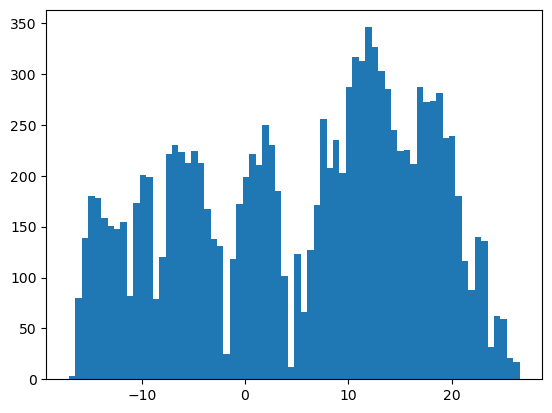

In [22]:
plt.hist(text_features_nor_umap_fit, bins=70)
plt.show

In [23]:
text_features_nor_tsne = TSNE(random_state=42, n_components=1)
text_features_nor_tsne_fit = text_features_nor_tsne.fit_transform(text_features_nor_array)
print(text_features_nor_tsne_fit)

D:\Anaconda Python\envs\data_analytics\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda Python\envs\data_analytics\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[-79.64071  ]
 [-64.6074   ]
 [ 90.43465  ]
 ...
 [  5.6615305]
 [-26.16938  ]
 [-44.394825 ]]


<function matplotlib.pyplot.show(close=None, block=None)>

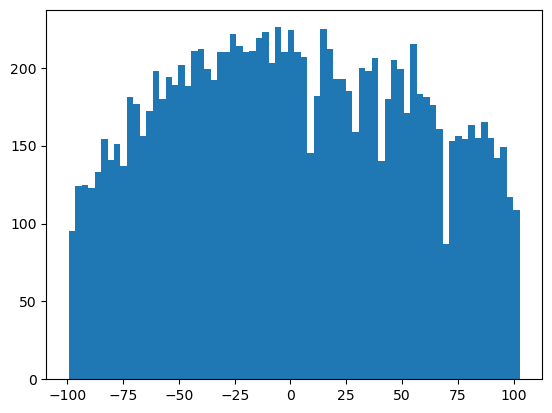

In [24]:
plt.hist(text_features_nor_tsne_fit, bins=70)
plt.show

In [25]:
readability_score_nor_umap = umap.UMAP(random_state=42, n_components=1)
readability_score_nor_umap_fit = readability_score_nor_umap.fit_transform(readability_score_nor_array)
print(readability_score_nor_umap_fit)

[[21.094229]
 [20.472433]
 [-8.299669]
 ...
 [16.377754]
 [25.712105]
 [23.172514]]


In [26]:
# readability_score_nor_fit = minmax_scale(readability_score_nor_fit, feature_range=(-2,2))
# Material_difficuly_by_score_DR = pd.DataFrame(data=readability_score_nor_fit, columns=["Material Difficulty"])
# display(Material_difficuly_by_score_DR)
# Material_difficuly_by_score_DR.to_csv("Data/Diffculty Level/Material_difficuly_by_score_DR.csv", index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

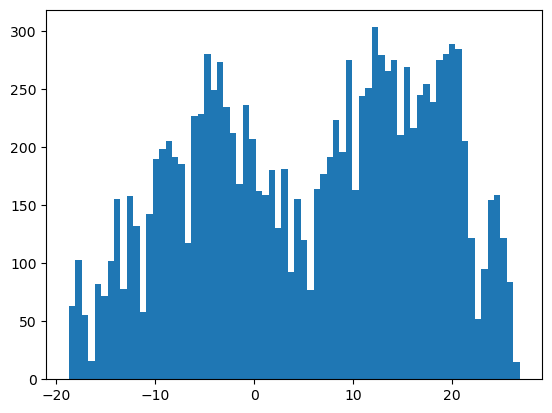

In [27]:
plt.hist(readability_score_nor_umap_fit, bins=70)
plt.show

In [28]:
readability_score_nor_tsne = TSNE(random_state=42, n_components=1)
readability_score_nor_tsne_fit = readability_score_nor_tsne.fit_transform(readability_score_nor_array)
print(readability_score_nor_tsne_fit)

D:\Anaconda Python\envs\data_analytics\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda Python\envs\data_analytics\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[-62.059635 ]
 [-86.27858  ]
 [ 90.02354  ]
 ...
 [ -6.903531 ]
 [  1.6118021]
 [ -2.9524255]]


<function matplotlib.pyplot.show(close=None, block=None)>

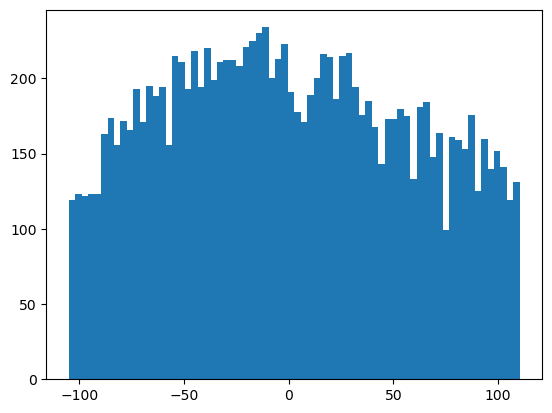

In [29]:
plt.hist(readability_score_nor_tsne_fit, bins=70)
plt.show

In [31]:
# plt.scatter(text_features_nor_umap_fit[:, 0], text_features_nor_umap_fit[:,1])

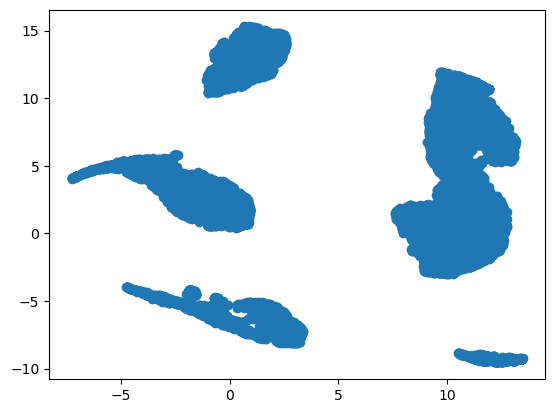

In [42]:
plt.scatter(readability_score_nor_umap_fit[:, 0], readability_score_nor_umap_fit[:,1])

In [30]:
text_features_nor_tsne_cluster= cluster.KMeans(n_clusters = 4, random_state = 42)
text_features_nor_tsne_labels_kmeans = text_features_nor_tsne_cluster.fit_predict(text_features_nor_tsne_fit)
print(text_features_nor_tsne_labels_kmeans)

[3 3 2 ... 0 1 1]


In [31]:
text_features_nor_umap_cluster= cluster.KMeans(n_clusters = 7, random_state = 42)
text_features_nor_umap_labels_kmeans = text_features_nor_umap_cluster.fit_predict(text_features_nor_umap_fit)
print(text_features_nor_umap_labels_kmeans)

[0 4 6 ... 2 5 4]


In [32]:
text_features_nor_cluster= cluster.KMeans(n_clusters = 7, random_state = 42)
text_features_nor_labels_kmeans = text_features_nor_cluster.fit_predict(text_features_nor_array)
print(text_features_nor_labels_kmeans)

[1 1 6 ... 1 1 1]


In [33]:
score_tsne_sil = silhouette_score(text_features_nor_tsne_fit, text_features_nor_tsne_labels_kmeans)
print("Text feature after tsne by sil:", score_tsne_sil)

score_tsne_dav = davies_bouldin_score(text_features_nor_tsne_fit, text_features_nor_tsne_labels_kmeans)
print("Text feature after tsne by dav:", score_tsne_dav)

score_tsne_cal = calinski_harabasz_score(text_features_nor_tsne_fit, text_features_nor_tsne_labels_kmeans)
print("Text feature after tsne by cal:", score_tsne_cal)

score_umap_sil = silhouette_score(text_features_nor_umap_fit, text_features_nor_umap_labels_kmeans)
print("Text feature after umap by sil:", score_umap_sil)

score_umap_dav = davies_bouldin_score(text_features_nor_umap_fit, text_features_nor_umap_labels_kmeans)
print("Text feature after umap by dav:", score_umap_dav)

score_umap_cal = calinski_harabasz_score(text_features_nor_umap_fit, text_features_nor_umap_labels_kmeans)
print("Text feature after umap by cal:", score_umap_cal)

score_sil = silhouette_score(text_features_nor_array, text_features_nor_labels_kmeans)
print("Text feature by sil:", score_sil)

score_dav = davies_bouldin_score(text_features_nor_array, text_features_nor_labels_kmeans)
print("Text feature by dav:", score_dav)

score_cal = calinski_harabasz_score(text_features_nor_array, text_features_nor_labels_kmeans)
print("Text feature by cal:", score_cal)

Text feature after tsne by sil: 0.55429184
Text feature after tsne by dav: 0.5165634047953687
Text feature after tsne by cal: 53971.04266492191
Text feature after umap by sil: 0.57279587
Text feature after umap by dav: 0.5061090452093392
Text feature after umap by cal: 99390.95424448978
Text feature by sil: 0.5081619884844278
Text feature by dav: 1.1523828326110606
Text feature by cal: 12826.009844023565


In [38]:
index_lebel0 = []
index_lebel1 = []
index_lebel2 = []
index_lebel3 = []
index_lebel4 = []
index_lebel5 = []
index_lebel6 = []

for i, l in enumerate(text_features_nor_umap_labels_kmeans):
    if l==0:
        index_lebel0.append(i)
    elif l==1:
        index_lebel1.append(i)
    elif l==2:
        index_lebel2.append(i)
    elif l==3:
        index_lebel3.append(i)
    elif l==4:
        index_lebel4.append(i)
    elif l==5:
        index_lebel5.append(i)
    elif l==6:
        index_lebel6.append(i)

In [34]:
index_lebel0 = []
index_lebel1 = []
index_lebel2 = []
index_lebel3 = []
index_lebel4 = []
index_lebel5 = []
index_lebel6 = []

for i, l in enumerate(text_features_nor_labels_kmeans):
    if l==0:
        index_lebel0.append(i)
    elif l==1:
        index_lebel1.append(i)
    elif l==2:
        index_lebel2.append(i)
    elif l==3:
        index_lebel3.append(i)
    elif l==4:
        index_lebel4.append(i)
    elif l==5:
        index_lebel5.append(i)
    elif l==6:
        index_lebel6.append(i)

In [35]:
print("label 0:")
for i in index_lebel0[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
    print(sum(text_features_nor_array[i])/5)
    
print("label 1:")
for i in index_lebel1[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
    print(sum(text_features_nor_array[i])/5)

print("label 2:")
for i in index_lebel2[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
    print(sum(text_features_nor_array[i])/5)
    
print("label 3:")
for i in index_lebel3[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
    print(sum(text_features_nor_array[i])/5)

print("label 4:")    
for i in index_lebel4[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
    print(sum(text_features_nor_array[i])/5)
    
print("label 5:")
for i in index_lebel5[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
   print(sum(text_features_nor_array[i])/5)

print("label 6:")
for i in index_lebel6[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
    print(sum(text_features_nor_array[i])/5)

label 0:
0.8410849976330415
0.9261414093527123
0.9036181411299695
0.8669369202580448
0.9242850991275325
1.0281303667935797
0.8670257311954881
1.010994447521353
0.8686432195845984
0.9513206472338431
0.8611932752191482
0.839672402700782
1.017710718597369
0.901338874680307
1.0014329429712387
0.9489827469413147
0.8939487716035031
0.9316662375329757
1.0781170254500072
0.8739797699705356
label 1:
0.25546900161030595
0.23610345095735114
0.21146355498721228
0.20534676044330777
0.25168453072928776
0.22676500946083628
0.17465768329070755
0.2152526697177727
0.20998401534526856
0.19931044080036103
0.2662789855072464
0.17392623502490234
0.18968918612325714
0.23302253522892533
0.20532960358056265
0.24899829497016196
0.2266032103917081
0.22927476555839724
0.17925823910800015
0.20029384572419665
label 2:
0.7311413494193114
0.6509156010230178
0.6695529092071612
0.6164551093636674
0.6191640711128713
0.6232229304312304
0.6960103121516165
0.651326992885837
0.5524581970300757
0.6355962732919253
0.661115943

In [43]:
materials_difficulty_cluster_directly = np.zeros(len(text_features_nor_labels_kmeans))
l1=0
l2=0
l3=0
l4=0
l5=0
l6=0
l7=0

for i,l in enumerate(text_features_nor_labels_kmeans):
    if l==0:
        l1+=0.01
        if l1>0.7:
            l1=0
        materials_difficulty_cluster_directly[i]=4.2+l1
    elif l==1:
        l2+=0.01
        if l2>0.7:
            l2=0
        materials_difficulty_cluster_directly[i]=0+l2
    if l==2:
        l3+=0.01
        if l3>0.7:
            l3=0
        materials_difficulty_cluster_directly[i]=2.1+l3
    elif l==3:
        l4+=0.01
        if l4>=0.7:
            l4=0
        materials_difficulty_cluster_directly[i]=1.4+l4
    if l==4:
        l5+=0.01
        if l5>0.7:
            l5=0
        materials_difficulty_cluster_directly[i]=3.5+l5
    elif l==5:
        l6+=0.01
        if l6>0.7:
            l6=0
        materials_difficulty_cluster_directly[i]=2.8+l6
    if l==6:
        l7+=0.01
        if l7>0.7:
            l7=0
        materials_difficulty_cluster_directly[i]=0.7+l7

In [41]:
materials_difficulty_cluster = np.zeros(len(text_features_nor_umap_labels_kmeans))
l1=0
l2=0
l3=0
l4=0
l5=0
l6=0
l7=0

for i,l in enumerate(text_features_nor_umap_labels_kmeans):
    if l==0:
        l1+=0.01
        if l1>0.5:
            l1=0
        materials_difficulty_cluster[i]=1.8+l1
    elif l==1:
        l2+=0.01
        if l2>0.5:
            l2=0
        materials_difficulty_cluster[i]=3.6+l2
    if l==2:
        l3+=0.01
        if l3>=0.5:
            l3=0
        materials_difficulty_cluster[i]=0.6+l3
    elif l==3:
        l4+=0.01
        if l4>=0.5:
            l4=0
        materials_difficulty_cluster[i]=3+l4
    if l==4:
        l5+=0.01
        if l5>=0.5:
            l5=0
        materials_difficulty_cluster[i]=1.2+l5
    elif l==5:
        l6+=0.01
        if l6>=0.5:
            l6=0
        materials_difficulty_cluster[i]=0+l6
    if l==6:
        l7+=0.01
        if l7>=0.5:
            l7=0
        materials_difficulty_cluster[i]=2.4+l7

In [44]:
print(len(materials_difficulty_cluster_directly))

materials_difficulty_cluster_df = pd.DataFrame(data=materials_difficulty_cluster_directly, columns=["Materials Difficulty"])
display(materials_difficulty_cluster_df)
# materials_difficulty_cluster_df.to_csv("Data/Diffculty Level/Mateials_diffculty_by_cluster_0_4.csv", index=False)
materials_difficulty_cluster_df.to_csv("Data/Diffculty Level/Mateials_diffculty_by_cluster_directely_0_5.csv", index=False)
# materials_difficulty_cluster_df.to_csv("Data/Diffculty Level/Mateials_diffculty_by_cluster_with_quesLen.csv", index=False)

12447


,Materials Difficulty
0,0.01
1,0.02
2,0.71
3,2.11
4,1.41
...,...
12442,0.49
12443,1.28
12444,0.50
12445,0.51


In [66]:
materials_difficulty_cluster = materials_difficulty_cluster_df
# materials_difficulty_cluster = pd.read_csv("Data/Diffculty Level/Mateials_diffculty_by_cluster_without_quesLen.csv")
questionsLen = []
for i, data in tqdm(enumerate(dataf)):
    ques = list(data.values())[0]
    questionsLen.append(len(ques))
    
materials_difficulty_cluster["discrimination"] = questionsLen
materials_difficulty_cluster = materials_difficulty_cluster[["discrimination", "Materials Difficulty"]]
display(materials_difficulty_cluster)
materials_difficulty_cluster.to_csv("Data/Diffculty Level/Mateials_diffculty_discrimination_by_cluster_with_quesLen.csv", index=False)

12447it [00:00, 1143299.87it/s]


,discrimination,Materials Difficulty
0,1,0.01
1,1,-0.99
2,2,1.01
3,3,2.01
4,3,2.02
...,...,...
12442,1,-2.77
12443,2,1.14
12444,1,-1.56
12445,1,-2.76


In [63]:
readability_score_nor_tsne_cluster= cluster.KMeans(n_clusters = 5, random_state = 42)
readability_score_nor_tsne_labels_kmeans = readability_score_nor_tsne_cluster.fit_predict(readability_score_nor_tsne_fit)
print(readability_score_nor_tsne_labels_kmeans)

[2 2 3 ... 4 4 4]


In [64]:
readability_score_nor_umap_cluster= cluster.KMeans(n_clusters = 5, random_state = 42)
readability_score_nor_umap_labels_kmeans = readability_score_nor_umap_cluster.fit_predict(readability_score_nor_umap_fit)
print(readability_score_nor_umap_labels_kmeans)

[3 3 1 ... 2 3 3]


In [65]:
score_tsne_sil = silhouette_score(readability_score_nor_tsne_fit, readability_score_nor_tsne_labels_kmeans)
print("Text feature after tsne by sil:", score_tsne_sil)

score_tsne_dav = davies_bouldin_score(readability_score_nor_tsne_fit, readability_score_nor_tsne_labels_kmeans)
print("Text feature after tsne by dav:", score_tsne_dav)

score_tsne_cal = calinski_harabasz_score(readability_score_nor_tsne_fit, readability_score_nor_tsne_labels_kmeans)
print("Text feature after tsne by cal:", score_tsne_cal)

score_umap_sil = silhouette_score(readability_score_nor_umap_fit, readability_score_nor_umap_labels_kmeans)
print("Text feature after umap by sil:", score_umap_sil)

score_umap_dav = davies_bouldin_score(readability_score_nor_umap_fit, readability_score_nor_umap_labels_kmeans)
print("Text feature after umap by dav:", score_umap_dav)

score_umap_cal = calinski_harabasz_score(readability_score_nor_umap_fit, readability_score_nor_umap_labels_kmeans)
print("Text feature after umap by cal:", score_umap_cal)

Text feature after tsne by sil: 0.5479454
Text feature after tsne by dav: 0.5107472251780878
Text feature after tsne by cal: 65217.89493005159
Text feature after umap by sil: 0.5470895
Text feature after umap by dav: 0.526627900546677
Text feature after umap by cal: 64755.01224908949


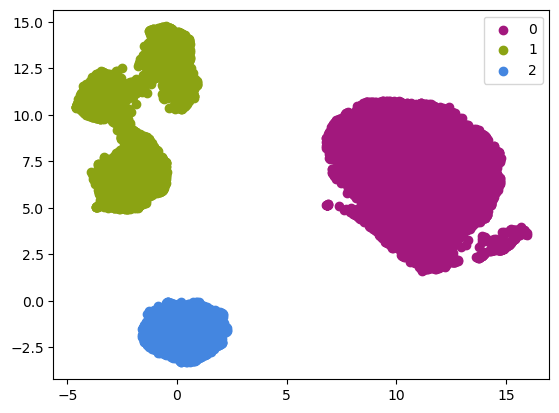

In [49]:
random.seed(10)
color_text_features_kmeans = {}
for c in set(text_features_nor_tsne_labels_kmeans):
    color_text_features_kmeans[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]



# plt.figure(figsize=(12,10))
for label in set(text_features_nor_tsne_labels_kmeans):
    plt.scatter(text_features_nor_fit[text_features_nor_tsne_labels_kmeans == label ,0], 
              text_features_nor_fit[text_features_nor_tsne_labels_kmeans == label,1], c=color_text_features_kmeans[label], label=label)
plt.legend()
plt.show()

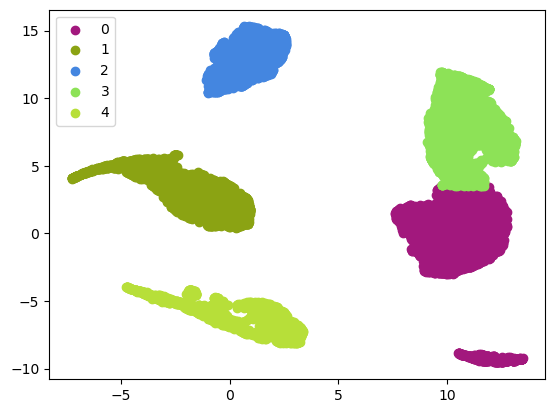

In [51]:
random.seed(10)
color_readability_score_kmeans = {}
for c in set(readability_score_nor_tsne_labels_kmeans):
    color_readability_score_kmeans[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]



# plt.figure(figsize=(12,10))
for label in set(readability_score_nor_tsne_labels_kmeans):
    plt.scatter(readability_score_nor_fit[readability_score_nor_tsne_labels_kmeans == label ,0], 
              readability_score_nor_fit[readability_score_nor_tsne_labels_kmeans == label,1], c=color_readability_score_kmeans[label], label=label)
plt.legend()
plt.show()

In [32]:
n_clusters = 1
text_features_gmm_model = GaussianMixture(n_components=n_clusters, covariance_type='spherical')
text_features_nor_tsne_labels_gmm = text_features_gmm_model.fit_predict(text_features_nor_fit)

<function matplotlib.pyplot.show(close=None, block=None)>

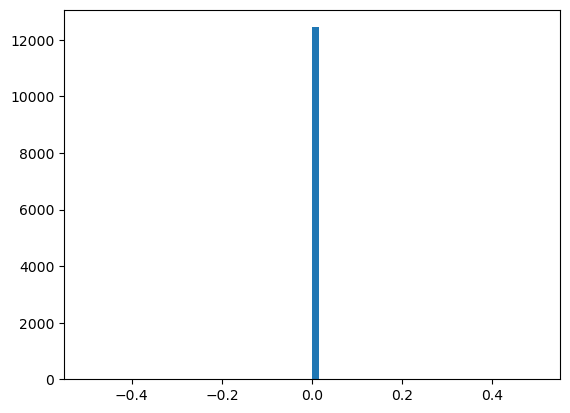

In [33]:
plt.hist(text_features_nor_tsne_labels_gmm, bins=70)
plt.show

In [34]:
n_clusters = 1
readability_score_gmm_model = GaussianMixture(n_components=n_clusters, covariance_type='spherical')
readability_score_nor_tsne_labels_gmm = readability_score_gmm_model.fit_predict(readability_score_nor_fit)

<function matplotlib.pyplot.show(close=None, block=None)>

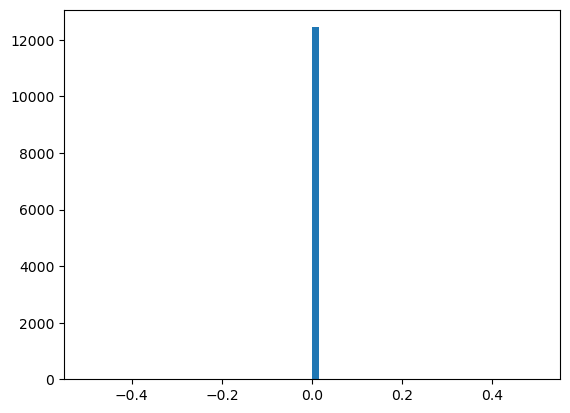

In [35]:
plt.hist(text_features_nor_tsne_labels_gmm, bins=70)
plt.show

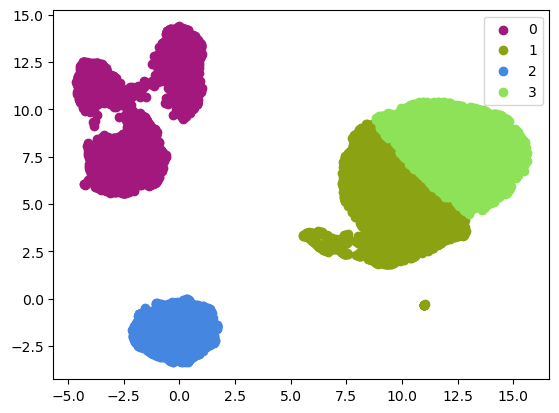

In [31]:
random.seed(10)
color_text_features_gmm = {}
for c in set(text_features_nor_tsne_labels_gmm):
    color_text_features_gmm[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

    
# plt.figure(figsize=(12,10))
for label in set(text_features_nor_tsne_labels_gmm):
    plt.scatter(text_features_nor_fit[text_features_nor_tsne_labels_gmm == label ,0], 
              text_features_nor_fit[text_features_nor_tsne_labels_gmm == label,1], c=color_text_features_gmm[label], label=label)
plt.legend()
plt.show()

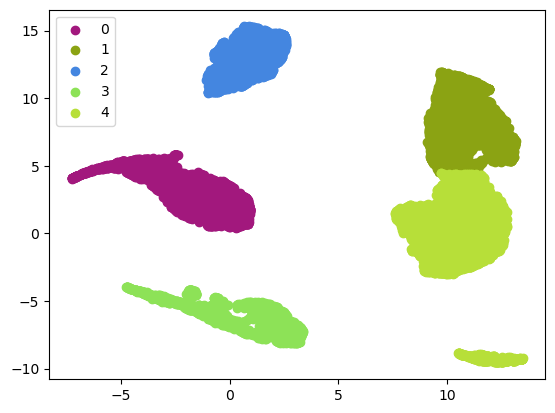

In [56]:
random.seed(10)
color_readability_score_gmm = {}
for c in set(readability_score_nor_tsne_labels_gmm):
    color_readability_score_gmm[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

    
# plt.figure(figsize=(12,10))
for label in set(readability_score_nor_tsne_labels_gmm):
    plt.scatter(readability_score_nor_fit[readability_score_nor_tsne_labels_gmm == label ,0], 
              readability_score_nor_fit[readability_score_nor_tsne_labels_gmm == label,1], c=color_readability_score_gmm[label], label=label)
plt.legend()
plt.show()